<a href="https://colab.research.google.com/github/JessMog/Python-Mini-Project-/blob/main/Moringa_Data_Science_Prep_Python_Mini_Project_2020_07_Code_Squad_DataReport_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MTN COTE D'IVOIRE DATA SCIENCE PROJECT


In this project,we will be conducting research for MTN Cote d'Ivoire, a leading telecom company and you will be answering the following research question.

Currently, MTN Cote d'Ivoire would like to upgrade its technology infrastructure for its mobile users in Ivory Coast. We will use the CRISP-DM methodology to draw insights from the data provided and consequently provide a recommendation. 


The data provided: 
*   cells_geo_description.xlsx : https://drive.google.com/file/d/1-rIM5ihDu79RaH7rAs-d-7SQSAQhrY9N/view
*   cells_geo.csv : https://drive.google.com/file/d/1ABZux280OjL3yWcOn8BDA_f5QsyO0QPU/view
*   CDR_description.xlsx : https://drive.google.com/file/d/1cVoNXl25IO5-_yQk97ThdeqhE6yw8YTD/view
*   CDR 20120507 [https://bit.ly/Telcom_dataset1]
*   CDR 20120508 [https://bit.ly/Telcom_dataset2]
*   CDR 20120509 [https://bit.ly/Telcom_dataset3]


The steps that will be followed: 

*   Importing Libraries 
*   Data Loading 
*   Data Understanding
*   Data Cleanup
*   Data Exploration 
*   Recommedation



# Importing Libraries

In [ ]:
#Import Pandas
import pandas as pd

#Import Numpy 
import numpy as np

# Data loading

In [ ]:
#Import cell geo dataset

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Create variable with shareable link 

link = 'https://drive.google.com/file/d/1utKcMBqqIE5odk_G1nIYCNfJX_LtSshG' # The shareable link

#Seperates the id portion after the d/

fluff, id = link.split('d/')
 
#storedataset in pandasframe 
downloaded = drive.CreateFile({'id':id});
downloaded.GetContentFile('cells_geo.csv') 

#Please note, when the program requests for a verification code, please click on the link that's above the request and then copy and paste the verification code provided

#seperate columns, make the first row the header and rename columns 
df_geo = pd.read_csv('cells_geo.csv', delimiter=';', header =0, names = ['Index','City', "Status","Location","GeoZone", "Zonename","Longitude","Latitude","Region","Area","Cell_ID","Site_Code"]) 

#drop the index column 
df_geo= df_geo.drop(columns=['Index'])

#View the top of the dataset
df_geo.head()

,City,Status,Location,GeoZone,Zonename,Longitude,Latitude,Region,Area,Cell_ID,Site_Code
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [ ]:
#Import CDR 20120507
 

Telcom_dataset = "https://bit.ly/Telcom_dataset1"
df_tel = pd.read_csv(Telcom_dataset,header=1, names = ['Product','Value','Date_Time','Cell_On_Site','Number_A','Number_B','Country_A','Country_B','Cell_ID','Site_ID'])

df_tel.head()

,Product,Value,Date_Time,Cell_On_Site,Number_A,Number_B,Country_A,Country_B,Cell_ID,Site_ID
0,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
1,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
2,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
3,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
4,data,0,2012-05-06 23:07:26.0,_,f71825ca6e623f9,5a4dc9e82deb309,19e2e,OTHER,/lrUXVGVcN,/lrUXVGVcN


In [ ]:
# Import CDR 20120508

Telcom_dataset2 = "https://bit.ly/Telcom_dataset2"
df_tel2 = pd.read_csv(Telcom_dataset2,header=1, names = ['Product','Value','Date_Time','Cell_On_Site','Number_A','Number_B','Country_A','Country_B','Cell_ID','Site_ID'])

df_tel2.head()

,Product,Value,Date_Time,Cell_On_Site,Number_A,Number_B,Country_A,Country_B,Cell_ID,Site_ID
0,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
2,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
3,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO
4,sms,0,2012-05-07 23:05:41.0,4,d73f11fdc9fcb30,ec90fdb12b50cbc,19e2e,19e2e,/MMplBlWjh,/MMplBlWjh


In [ ]:
# Import CDR 20120509

Telcom_dataset3 = "https://bit.ly/Telcom_dataset3"
df_tel3 = pd.read_csv(Telcom_dataset3, header=1, names = ['Product','Value','Date_Time','Cell_On_Site','Number_A','Number_B','Country_A','Country_B','Cell_ID','Site_ID'])

df_tel3.head(10)

,Product,Value,Date_Time,Cell_On_Site,Number_A,Number_B,Country_A,Country_B,Cell_ID,Site_ID
0,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
1,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
2,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
3,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA
4,Voice,10,2012-05-08 23:03:59.0,0,c572f692ed9d25f,5e6221fa6b35f62,19e2e,19e2e,+e+xcimwre,+e+xcimwre
5,sms,0,2012-05-08 23:06:06.0,0,32cc9a0c68cc9ee,9eb1b241c685914,19e2e,19e2e,+R5ccmtyJf,+R5ccmtyJf
6,Voice,10,2012-05-08 23:06:55.0,1,38c234bf93b3aac,ae0bd079dc09dd5,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
7,sms,25,2012-05-08 23:07:09.0,1,6dd0d088cceca75,9bdc6a2acd8ee15,19e2e,19e2e,13O1+JEun3,13O1+JEun3
8,sms,0,2012-05-08 23:07:38.0,0,9572b11240ca426,64898ae3aa9cc93,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA
9,sms,0,2012-05-08 23:07:43.0,2,5b6f26b5d0758fe,e284afced19fcba,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA



# Data Understanding


In [ ]:
#Data Sets
#Data obtained from the Cells Geo Dataset
print(df_geo.info())
print(df_geo.describe())

print(df_geo.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       3974 non-null   object 
 1   Status     3907 non-null   object 
 2   Location   3974 non-null   object 
 3   GeoZone    3974 non-null   object 
 4   Zonename   3968 non-null   object 
 5   Longitude  3974 non-null   float64
 6   Latitude   3974 non-null   float64
 7   Region     3974 non-null   object 
 8   Area       3951 non-null   object 
 9   Cell_ID    3974 non-null   object 
 10  Site_Code  3974 non-null   object 
dtypes: float64(2), object(9)
memory usage: 341.6+ KB
None
         Longitude     Latitude
count  3974.000000  3974.000000
mean     -4.877659     6.244749
std       1.300771     1.304199
min      -8.503889     0.000000
25%      -5.846139     5.338639
50%      -4.084500     5.475000
75%      -3.993444     6.872306
max      -0.000000    10.481861
City          0
Status    

In [ ]:
##Data obtained from the Telecom Dataset 1
print(df_tel.info())
print(df_tel.describe())

print(df_tel.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       5000 non-null   object
 1   Value         5000 non-null   int64 
 2   Date_Time     5000 non-null   object
 3   Cell_On_Site  5000 non-null   object
 4   Number_A      5000 non-null   object
 5   Number_B      5000 non-null   object
 6   Country_A     5000 non-null   object
 7   Country_B     5000 non-null   object
 8   Cell_ID       5000 non-null   object
 9   Site_ID       4284 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB
None
            Value
count  5000.00000
mean     25.87480
std     101.94404
min       0.00000
25%       0.00000
50%       0.00000
75%      25.00000
max    4440.00000
Product           0
Value             0
Date_Time         0
Cell_On_Site      0
Number_A          0
Number_B          0
Country_A         0
Country_B         0
Cell_ID   

In [ ]:
##Data obtained from the Telecom Dataset 2
print(df_tel2.info())
print(df_tel2.describe())
#To print the null values in the data set being used
print(df_tel2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       5000 non-null   object
 1   Value         5000 non-null   int64 
 2   Date_Time     5000 non-null   object
 3   Cell_On_Site  5000 non-null   object
 4   Number_A      5000 non-null   object
 5   Number_B      5000 non-null   object
 6   Country_A     5000 non-null   object
 7   Country_B     5000 non-null   object
 8   Cell_ID       5000 non-null   object
 9   Site_ID       4324 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB
None
             Value
count  5000.000000
mean     24.339800
std      97.480726
min       0.000000
25%       0.000000
50%       0.000000
75%      25.000000
max    3380.000000
Product           0
Value             0
Date_Time         0
Cell_On_Site      0
Number_A          0
Number_B          0
Country_A         0
Country_B         0
C

In [ ]:
##Data obtained from the Telecom Dataset 2

print(df_tel3.info())
print(df_tel3.describe())

print(df_tel3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       5000 non-null   object
 1   Value         5000 non-null   int64 
 2   Date_Time     5000 non-null   object
 3   Cell_On_Site  5000 non-null   object
 4   Number_A      5000 non-null   object
 5   Number_B      5000 non-null   object
 6   Country_A     5000 non-null   object
 7   Country_B     5000 non-null   object
 8   Cell_ID       5000 non-null   object
 9   Site_ID       4395 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB
None
              Value
count   5000.000000
mean      26.434600
std      224.222108
min        0.000000
25%        0.000000
50%        0.000000
75%       25.000000
max    12900.000000
Product           0
Value             0
Date_Time         0
Cell_On_Site      0
Number_A          0
Number_B          0
Country_A         0
Country_B   

In [ ]:
#CDR Dataframe and descriptive statistics. Dataset Cell Geo
print("DATASET CELL GEO INFRORMATION")
print(df_geo.info())
print(" DATASET GEO Descriptive Statistics")
print(df_geo.describe())
print("DATASET GEO Null Value")
print(df_geo.isnull().sum())

DATASET CELL GEO INFRORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       3974 non-null   object 
 1   Status     3907 non-null   object 
 2   Location   3974 non-null   object 
 3   GeoZone    3974 non-null   object 
 4   Zonename   3968 non-null   object 
 5   Longitude  3974 non-null   float64
 6   Latitude   3974 non-null   float64
 7   Region     3974 non-null   object 
 8   Area       3951 non-null   object 
 9   Cell_ID    3974 non-null   object 
 10  Site_Code  3974 non-null   object 
dtypes: float64(2), object(9)
memory usage: 341.6+ KB
None
 DATASET GEO Descriptive Statistics
         Longitude     Latitude
count  3974.000000  3974.000000
mean     -4.877659     6.244749
std       1.300771     1.304199
min      -8.503889     0.000000
25%      -5.846139     5.338639
50%      -4.084500     5.475000
75%      -3.993444     6

In [ ]:
#Dataset Telecom 1
print("DATASET UNO INFRORMATION")
print(df_tel.info())
print(" DASET UNO Descriptive Statistics")
print(df_tel.describe())
print("DATASE UNO Null Value")
print(df_tel.isnull().sum())

DATASET UNO INFRORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       5000 non-null   object
 1   Value         5000 non-null   int64 
 2   Date_Time     5000 non-null   object
 3   Cell_On_Site  5000 non-null   object
 4   Number_A      5000 non-null   object
 5   Number_B      5000 non-null   object
 6   Country_A     5000 non-null   object
 7   Country_B     5000 non-null   object
 8   Cell_ID       5000 non-null   object
 9   Site_ID       4284 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB
None
 DASET UNO Descriptive Statistics
            Value
count  5000.00000
mean     25.87480
std     101.94404
min       0.00000
25%       0.00000
50%       0.00000
75%      25.00000
max    4440.00000
DATASE UNO Null Value
Product           0
Value             0
Date_Time         0
Cell_On_Site      0
Number_A 

In [ ]:
#Dataset Telecom 2
print("DATASET DOS INFRORMATION")
print(df_tel2.info())
print(" DATASET DOS Descriptive Statistics")
print(df_tel2.describe())
print("DATABASE DOS Null Value")
print(df_tel2.isnull().sum())

DATASET DOS INFRORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       5000 non-null   object
 1   Value         5000 non-null   int64 
 2   Date_Time     5000 non-null   object
 3   Cell_On_Site  5000 non-null   object
 4   Number_A      5000 non-null   object
 5   Number_B      5000 non-null   object
 6   Country_A     5000 non-null   object
 7   Country_B     5000 non-null   object
 8   Cell_ID       5000 non-null   object
 9   Site_ID       4324 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB
None
 DATASET DOS Descriptive Statistics
             Value
count  5000.000000
mean     24.339800
std      97.480726
min       0.000000
25%       0.000000
50%       0.000000
75%      25.000000
max    3380.000000
DATABASE DOS Null Value
Product           0
Value             0
Date_Time         0
Cell_On_Site    

In [ ]:
#Dataset Telecom 3
print("DATASET TRES INFRORMATION")
print(df_tel3.info())
print(" DATASET TRES Descriptive Statistics")
print(df_tel3.describe())
print("DATABASE TRES Null Value")
print(df_tel3.isnull().sum())

DATASET TRES INFRORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       5000 non-null   object
 1   Value         5000 non-null   int64 
 2   Date_Time     5000 non-null   object
 3   Cell_On_Site  5000 non-null   object
 4   Number_A      5000 non-null   object
 5   Number_B      5000 non-null   object
 6   Country_A     5000 non-null   object
 7   Country_B     5000 non-null   object
 8   Cell_ID       5000 non-null   object
 9   Site_ID       4395 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB
None
 DATASET TRES Descriptive Statistics
              Value
count   5000.000000
mean      26.434600
std      224.222108
min        0.000000
25%        0.000000
50%        0.000000
75%       25.000000
max    12900.000000
DATABASE TRES Null Value
Product           0
Value             0
Date_Time         0
Cell

# Data Preparation and Cleaning

In [ ]:
#PREPARING CELL GEO DATASET.
df_geo.head()

,City,Status,Location,GeoZone,Zonename,Longitude,Latitude,Region,Area,Cell_ID,Site_Code
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [ ]:
#Checking missing values and datatypes.

df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       3974 non-null   object 
 1   Status     3907 non-null   object 
 2   Location   3974 non-null   object 
 3   GeoZone    3974 non-null   object 
 4   Zonename   3968 non-null   object 
 5   Longitude  3974 non-null   float64
 6   Latitude   3974 non-null   float64
 7   Region     3974 non-null   object 
 8   Area       3951 non-null   object 
 9   Cell_ID    3974 non-null   object 
 10  Site_Code  3974 non-null   object 
dtypes: float64(2), object(9)
memory usage: 341.6+ KB


In [ ]:
#check values in Status column.
#there is only one unique value "in service"

df_geo['Status'].unique

<bound method Series.unique of 0       In Service
1       In Service
2       In Service
3       In Service
4       In Service
           ...    
3969    In Service
3970    In Service
3971    In Service
3972    In Service
3973    In Service
Name: Status, Length: 3974, dtype: object>

In [ ]:
#replacing missing values in Status,Zone Name and Area.

df_geo["Status"]=df_geo['Status'].fillna("not in service")
df_geo["Zonename"]=df_geo['Zonename'].fillna("None")
df_geo["Area"]=df_geo['Area'].fillna("None")


df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       3974 non-null   object 
 1   Status     3974 non-null   object 
 2   Location   3974 non-null   object 
 3   GeoZone    3974 non-null   object 
 4   Zonename   3974 non-null   object 
 5   Longitude  3974 non-null   float64
 6   Latitude   3974 non-null   float64
 7   Region     3974 non-null   object 
 8   Area       3974 non-null   object 
 9   Cell_ID    3974 non-null   object 
 10  Site_Code  3974 non-null   object 
dtypes: float64(2), object(9)
memory usage: 341.6+ KB


In [ ]:
#CLEANING CDR DATASETS
#concatenating cdr_data datafiles to one  
cdr_data = pd.concat([df_tel,df_tel2,df_tel3], axis=0)
cdr_data.head()

,Product,Value,Date_Time,Cell_On_Site,Number_A,Number_B,Country_A,Country_B,Cell_ID,Site_ID
0,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
1,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
2,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
3,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
4,data,0,2012-05-06 23:07:26.0,_,f71825ca6e623f9,5a4dc9e82deb309,19e2e,OTHER,/lrUXVGVcN,/lrUXVGVcN


In [ ]:
#checking cdr_data datatypes
cdr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       15000 non-null  object
 1   Value         15000 non-null  int64 
 2   Date_Time     15000 non-null  object
 3   Cell_On_Site  15000 non-null  object
 4   Number_A      15000 non-null  object
 5   Number_B      15000 non-null  object
 6   Country_A     15000 non-null  object
 7   Country_B     15000 non-null  object
 8   Cell_ID       15000 non-null  object
 9   Site_ID       13003 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


In [ ]:
#change date_time datatype to datetime64 
cdr_data['Date_Time'] = pd.to_datetime(cdr_data['Date_Time'])
cdr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product       15000 non-null  object        
 1   Value         15000 non-null  int64         
 2   Date_Time     15000 non-null  datetime64[ns]
 3   Cell_On_Site  15000 non-null  object        
 4   Number_A      15000 non-null  object        
 5   Number_B      15000 non-null  object        
 6   Country_A     15000 non-null  object        
 7   Country_B     15000 non-null  object        
 8   Cell_ID       15000 non-null  object        
 9   Site_ID       13003 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
#removing time on date_time column and changing the datatype.
cdr_data['Date_Time'] = cdr_data['Date_Time'].astype(str)
cdr_data['Date_Time']= cdr_data.Date_Time.str.split(expand=True)
cdr_data['Date_Time']= pd.to_datetime(cdr_data['Date_Time'])
cdr_data

,Product,Value,Date_Time,Cell_On_Site,Number_A,Number_B,Country_A,Country_B,Cell_ID,Site_ID
0,sms,0,2012-05-06,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
1,sms,25,2012-05-06,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
2,Voice,56,2012-05-06,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
3,Voice,14,2012-05-06,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
4,data,0,2012-05-06,_,f71825ca6e623f9,5a4dc9e82deb309,19e2e,OTHER,/lrUXVGVcN,/lrUXVGVcN
...,...,...,...,...,...,...,...,...,...,...
4995,Voice,0,2012-05-09,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,2aa04dcab7,f7d63a29e5
4996,Voice,62,2012-05-09,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,7f1f2f889f,b4ddb9e93c
4997,Voice,32,2012-05-09,1,77f53c39d27c050,9d064f013e2cab2,19e2e,19e2e,a4731e780e,d68260ef50
4998,Voice,30,2012-05-09,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,98ed726da2,b4130b54ab


In [ ]:
#drop non required data {countryA & countryB }

cdr_data.drop(['Country_A',"Country_B"],inplace=True,axis=1)
cdr_data

,Product,Value,Date_Time,Cell_On_Site,Number_A,Number_B,Cell_ID,Site_ID
0,sms,0,2012-05-06,0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
1,sms,25,2012-05-06,0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi
2,Voice,56,2012-05-06,1,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3
3,Voice,14,2012-05-06,1,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv
4,data,0,2012-05-06,_,f71825ca6e623f9,5a4dc9e82deb309,/lrUXVGVcN,/lrUXVGVcN
...,...,...,...,...,...,...,...,...
4995,Voice,0,2012-05-09,3,467333ade2b4b9c,0ab2acd804d01fe,2aa04dcab7,f7d63a29e5
4996,Voice,62,2012-05-09,1,e077a6b74c5053c,4c8098eb6ea1a41,7f1f2f889f,b4ddb9e93c
4997,Voice,32,2012-05-09,1,77f53c39d27c050,9d064f013e2cab2,a4731e780e,d68260ef50
4998,Voice,30,2012-05-09,2,672ce74c418aa7a,f9ff5af59cf0d68,98ed726da2,b4130b54ab


In [ ]:
#sorting using date.
cdr_data=cdr_data.sort_values(by=["Date_Time"],ascending=True)
cdr_data


,Product,Value,Date_Time,Cell_On_Site,Number_A,Number_B,Cell_ID,Site_ID
0,sms,0,2012-05-06,0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
437,Voice,0,2012-05-06,2,898432cc8d98a48,31f4379c7c4c4ab,FB5DvKuz6u,FB5DvKuz6u
438,sms,0,2012-05-06,5,c38c82fb1bb7e35,84ab7ea94356db2,J/4DYkbgci,J/4DYkbgci
439,sms,0,2012-05-06,0,8600bde83fe1fb2,d164ed0a0cf2360,47yB6si0R9,47yB6si0R9
440,sms,0,2012-05-06,1,3033be348206149,9db52c7e9e9998d,IqZXy1M6f/,IqZXy1M6f/
...,...,...,...,...,...,...,...,...
2057,sms,0,2012-05-09,2,045a14285047016,2bcc1dbf98af662,5098c9e365,75bef3291a
2056,sms,0,2012-05-09,2,877e1b5e1beb1bf,0a8d8cbb5ecb914,f5a1b8aae0,fc6419d378
2055,data,0,2012-05-09,_,eaa55aa87c6b0ef,5a4dc9e82deb309,ffa6759bb2,NaN
2061,sms,0,2012-05-09,3,4199863df5323e5,29376a356583114,1074ac4397,ad84d6f9fe


In [ ]:
#sum of missing data on Site ID
cdr_data['Site_ID'].isna().sum()


1997

In [ ]:
#fill missing values on site id column with zeros
cdr_data["Site_ID"]=cdr_data['Site_ID'].fillna(0)
cdr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product       15000 non-null  object        
 1   Value         15000 non-null  int64         
 2   Date_Time     15000 non-null  datetime64[ns]
 3   Cell_On_Site  15000 non-null  object        
 4   Number_A      15000 non-null  object        
 5   Number_B      15000 non-null  object        
 6   Cell_ID       15000 non-null  object        
 7   Site_ID       15000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.0+ MB


# Data Exploration and Modelling

What is the most used product? 

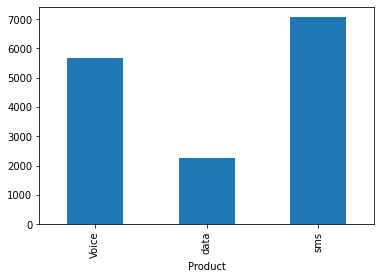

In [ ]:
#most used product
#sms isthe most used product
cdr_data.groupby('Product')['Value'].count().plot.bar()

Which product brings the most income?

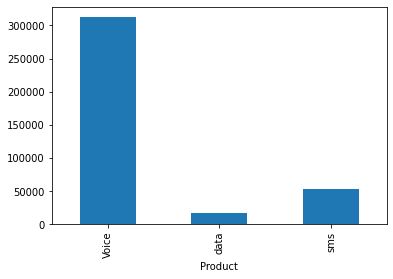

In [ ]:
#voice product brings most income to m
cdr_data.groupby('Product')['Value'].sum().plot.bar()

What is the most valuable cell?


In [ ]:
#Most valuable cell ID in 3 days
cdr_data.groupby('Cell_ID').count().nlargest(5,'Value')

,Product,Value,Date_Time,Cell_On_Site,Number_A,Number_B,Site_ID
Cell_ID,,,,,,,
ffa6759bb2,1996,1996,1996,1996,1996,1996,1996
03ee801971,75,75,75,75,75,75,75
cc7ce19d6b,65,65,65,65,65,65,65
d22224b2fa,43,43,43,43,43,43,43
b78724d6fc,42,42,42,42,42,42,42


Which cities bring the highest income?

In [ ]:
# Cities with the highest income 
cdr_cells = pd.merge(df_geo,cdr_data, how='left', on=['Cell_ID'])
cdr_cells
cdr_cells.groupby('City').count().nlargest(5,'Value')

,Status,Location,GeoZone,Zonename,Longitude,Latitude,Region,Area,Cell_ID,Site_Code,Product,Value,Date_Time,Cell_On_Site,Number_A,Number_B,Site_ID
City,,,,,,,,,,,,,,,,,
ABENGOUROU,21,21,21,21,21,21,21,21,21,21,0,0,0,0,0,0,0
ABOBO,255,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,0
ABOISSO,18,18,18,18,18,18,18,18,18,18,0,0,0,0,0,0,0
ABOISSO COMOE,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0
ABONGOUA,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0


Which cities have the lowest number of cell_ID?


In [ ]:
# Cities with lowest number of cells_ID on site
cdr_cells.groupby('City').count().nsmallest(5,'Cell_ID')

,Status,Location,GeoZone,Zonename,Longitude,Latitude,Region,Area,Cell_ID,Site_Code,Product,Value,Date_Time,Cell_On_Site,Number_A,Number_B,Site_ID
City,,,,,,,,,,,,,,,,,
DANANON,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
OUANGOLO,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
KOTOULA,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0
MEMNI,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0
ABOISSO COMOE,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0


# Data Evaluation and Recommendation



1.   Expand infrastructure in Aboisso Comoe as it is one of the top 5 cities in terms of income yet has the lowest number of cells_ID 

 
2.  Ensure ffa6759bb2 cell is upgraded as it is by far the most valuable and used cell compared to the others


3.  Prioritize Voice as a product because it brings the the most income and is the second most popular product






